# Определение перспективного тарифа для телеком-компании

Пользователям предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

***Описание тарифов***<br>
<br>
**Тариф «Смарт»**<br>
Ежемесячная плата: 550 рублей<br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.<br>
<br>
**Тариф «Ультра»**<br>
Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>
Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

## Изучим общую информацию

In [1]:
#Импортируем все необходимы для дальнейшей работы библиотеки
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', 30)

In [3]:
#Открываем и изучаем файл /datasets/calls.csv
data_calls = pd.read_csv('/datasets/calls.csv')

data_calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [4]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
data_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [6]:
#Открываем и изучаем файл /datasets/internet.csv
data_internet = pd.read_csv('/datasets/internet.csv')

data_internet.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [7]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
data_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [9]:
#Открываем и изучаем файл /datasets/messages.csv
data_messages = pd.read_csv('/datasets/messages.csv')

data_messages.head(15)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [10]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
data_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [12]:
#Открываем и изучаем файл /datasets/tariffs.csv
data_traffs = pd.read_csv('/datasets/tariffs.csv')

data_traffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
data_traffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
data_traffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [15]:
#Открываем и изучаем файл /datasets/users.csv
data_users = pd.read_csv('/datasets/users.csv')

data_users.head(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [16]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [17]:
data_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [18]:
#проверяем на пропущенные значения
data_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Только в этом файле были замечены пропущенные значения: в столбце churn_date. Но так как это дата прекращения пользования тарифом, то пропущенное значение означает, что тариф ещё действовал на момент выгрузки данных. (можно будет заменить на 0, чтобы было удобнее представление данных)

*Вывод*<br>
В таблицах описываются данные пользователей (личная информация о пользователе, данные о звонках, сообщениях и интернет-трафике) и тарифные планы, которые они используют. Пропуски были замечены только в одной таблице, но уже выяснили, что это не ошибка данных. Больше всего стоит обратить внимание на типы данных, необходимо будет привести данные к верному типу, а так же в легкочитаемый вид. <br>
Проведем предобработку данных. Так же в таблице о звонках присутствуют нулевые значения - это пропущенные звонки.

****

## Подготовка данных

### Предобработка данных

*Прежде чем перейти к приведению данных к нужному типу, проверим на наличие отрицательных значений (их быть не должно) и дубликатов:*

In [19]:
#Проверка на отрицательные значения
#создадим список с таблицами
list_table = [data_calls, data_internet, data_messages, data_traffs, data_users]

#создадим список с названиями таблиц
list_nametable = ['data_calls', 'data_internet', 'data_messages', 'data_traffs', 'data_users']

#применим цикл, перебирающий таблицы из первого списка по индексам
for i in range(0, len(list_table)):
    print(list_nametable[i])
    
    #применим цикл, перебирающий названия колонок в индексе
    for column_name in list_table[i].dtypes.index:
        
        #если данные для колонки соответствуют int или float, то применим проверку на отрицательные значения
        if list_table[i][column_name].dtypes == 'int64' or list_table[i][column_name].dtypes == 'float64':
            if list_table[i][list_table[i][column_name] < 0][column_name].count() > 0:
                print ('|{: <22}|{: >4}|'.format(column_name, 'Есть'))
            else:
                print('|{: <22}|{: >4}|'.format(column_name, 'Нет'))

data_calls
|duration              | Нет|
|user_id               | Нет|
data_internet
|Unnamed: 0            | Нет|
|mb_used               | Нет|
|user_id               | Нет|
data_messages
|user_id               | Нет|
data_traffs
|messages_included     | Нет|
|mb_per_month_included | Нет|
|minutes_included      | Нет|
|rub_monthly_fee       | Нет|
|rub_per_gb            | Нет|
|rub_per_message       | Нет|
|rub_per_minute        | Нет|
data_users
|user_id               | Нет|
|age                   | Нет|


Отрицательных значений не обнаружено. Переходим к проверке на дубликаты.

In [20]:
#так же с помощью списов проверим наличие дубликатов в данных
for i in range(0, len(list_table)):
    if list_table[i].duplicated().sum() == 0:
        print('|{: <12}|{: >15}|'.format(list_nametable[i], 'Нет'))
    elif list_tables[i].duplicated().sum() != 0:
        print('|{: <12}|{: >15}|'.format(list_nametable[i], 'Есть'))

|data_calls  |            Нет|
|data_internet|            Нет|
|data_messages|            Нет|
|data_traffs |            Нет|
|data_users  |            Нет|


*Мы убедились, что дубликаты и отрицательные значения отсутствую. Теперь займемся приведение данных к нужным типам*

In [21]:
#В data_calls приведем столбец с датами к типу datetime
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [22]:
#в data_internet приведем так же колонку с датами к нужному нам типу
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [23]:
#в data_message приведем так же колонку с датами к нужному нам типу
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [25]:
#в data_users приведем так же колонки с датами к нужному нам типу
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


В data_traffs нет значений, которые нужно было бы приводить их к определенному типу.

****

***Проверим на наличе ошибок***

In [26]:
#в таблице df_internet нам попался столбец Unnamed 0, который повтоярет индексы строк
#Удалим его
del data_internet['Unnamed: 0']

data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [27]:
#посчитаем количество нулевых значений столба duration в data_calls
data_calls[data_calls['duration']==0]['duration'].count()

39613

Почти 20% данных - нулевые значения, то есть пропущенные звонки. Соответственно это не является ошибкой, ликвидировать ее нет необходимости.

### Вычисление параметров для каждого пользователя

Для каждого пользователя нужно посчитать следующие параметры:<br>
- количество сделанных звонков и израсходованных минут разговора по месяцам;<br>
- количество отправленных сообщений по месяцам;<br>
- объем израсходованного интернет-трафика по месяцам;<br>
- помесячную выручку с каждого пользователя.<br>

*Для более удобной дальнейшей группировки добавим в каждую таблицу столбец month, так как стоимость тарифа расчитывается именно за месяц.*

In [28]:
#нам нужны данные только о звонках, сообщениях и трафике, 
#поэтому добавляем столбец month только в таблицы data_calls, data_internet и data_messages

data_calls['month'] = data_calls['call_date'].dt.month
data_internet['month'] = data_internet['session_date'].dt.month
data_messages['month'] = data_messages['message_date'].dt.month

data_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [29]:
data_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [30]:
data_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


****

*С помощью сводных таблиц расчитаем заданные нам параметры. Данные будем группировать по month и user_id*

In [32]:
#составляем сводную таблицу по звонкам
data_calls_pivot = data_calls.pivot_table(index=['user_id','month'], aggfunc={'call_date':'count', 'duration':sum})

#названия колонок обозначим как calls_count - количество звонков, calls_duration - длительность разговора
data_calls_pivot.columns = ['calls_count', 'calls_duration']

#Округляем значения в большую сторону
data_calls_pivot['calls_duration'] = np.ceil(data_calls_pivot['calls_duration'])

data_calls_pivot.head()

calls_count  calls_duration
user_id month                             
1000    5               22           151.0
        6               43           159.0
        7               47           319.0
        8               52           390.0
        9               58           441.0

In [33]:
#составляем сводную таблицу по сообщениям
data_messages_pivot = data_messages.pivot_table(index=['user_id','month'], aggfunc={'id':'count'})

#названия колонок обозначим как messages_count - количество сообщений
data_messages_pivot.columns = ['messages_count']
data_messages_pivot.head()

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57

In [34]:
#составляем сводную таблицу по траффику
data_internet_pivot = data_internet.pivot_table(index=['user_id','month'], aggfunc={'mb_used':sum})

#названия колонок обозначим как traffic_volume - объем траффика
data_internet_pivot.columns = ['traffic_volume']

#Округляем значения в большую сторону
data_internet_pivot['traffic_volume'] = np.ceil(data_internet_pivot['traffic_volume'])

data_internet_pivot.head()

traffic_volume
user_id month                
1000    5              2254.0
        6             23234.0
        7             14004.0
        8             14056.0
        9             14569.0

****

*Посчитаем выручку с каждого пользователя*

In [35]:
#объединим все сводные таблицы и таблицу data_users

data_proceeds_pivot = data_internet_pivot.join([data_calls_pivot, data_messages_pivot]).reset_index(level='month')
data_proceeds_pivot = data_users.join(data_proceeds_pivot, on='user_id')

data_proceeds_pivot.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month,traffic_volume,calls_count,calls_duration,messages_count
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5.0,2254.0,22.0,151.0,22.0
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6.0,23234.0,43.0,159.0,60.0
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7.0,14004.0,47.0,319.0,75.0
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8.0,14056.0,52.0,390.0,81.0
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9.0,14569.0,58.0,441.0,57.0


*В этой таблице присутствуют столбцы, которые нам не нужны и будут только мешать при работе с данными, нужно их удалить. 

In [36]:
data_proceeds_pivot = data_proceeds_pivot.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')

data_proceeds_pivot.head()

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count
0,1000,52,Краснодар,ultra,5.0,2254.0,22.0,151.0,22.0
0,1000,52,Краснодар,ultra,6.0,23234.0,43.0,159.0,60.0
0,1000,52,Краснодар,ultra,7.0,14004.0,47.0,319.0,75.0
0,1000,52,Краснодар,ultra,8.0,14056.0,52.0,390.0,81.0
0,1000,52,Краснодар,ultra,9.0,14569.0,58.0,441.0,57.0


In [37]:
data_proceeds_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3206 entries, 0 to 499
Data columns (total 9 columns):
user_id           3206 non-null int64
age               3206 non-null int64
city              3206 non-null object
tariff            3206 non-null object
month             3203 non-null float64
traffic_volume    3203 non-null float64
calls_count       3163 non-null float64
calls_duration    3163 non-null float64
messages_count    2706 non-null float64
dtypes: float64(5), int64(2), object(2)
memory usage: 250.5+ KB


*Добавим к имеющейся таблице информацию о тарифах из data_traffs. Объединим по колонке с названием тарифа.*

In [38]:
#Прежде чем объединять необходимо поменять название колонки с тарифами в data_traffs
data_traffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
     'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']


data_traffs.head()    

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [39]:
data_proceeds_pivot = data_proceeds_pivot.merge(data_traffs, on='tariff')
data_proceeds_pivot.head()

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,Краснодар,ultra,5.0,2254.0,22.0,151.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,Краснодар,ultra,6.0,23234.0,43.0,159.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,Краснодар,ultra,7.0,14004.0,47.0,319.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,Краснодар,ultra,8.0,14056.0,52.0,390.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,Краснодар,ultra,9.0,14569.0,58.0,441.0,57.0,1000,30720,3000,1950,150,1,1


In [40]:
data_proceeds_pivot.isna().sum()

user_id                    0
age                        0
city                       0
tariff                     0
month                      3
traffic_volume             3
calls_count               43
calls_duration            43
messages_count           500
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

После объединения таблиц появились пропуски, особенно много их в messages_count. Скорее всего это произошло из-за разницы в исходных данных. Заменим пропуски на 0, так как если отбросить эти пропуски, то будет потеряно много данных, а если оставить как есть, то это будет искажать дальнейшие расчеты.<br>
Пропуски в колонке month заменить на ноль нельзя, но так как их всего 3, то можно удалить не беспокоясь о потери данных.<br>
traffic_volume, calls_count и calls_duration так же имеют немного пропусков, но их удалять не стоит, поэтому как и в messages_count заменим их на 0.

In [41]:
data_proceeds_pivot = data_proceeds_pivot.dropna(subset=['month']).fillna(0)
data_proceeds_pivot.isna().sum() 

user_id                  0
age                      0
city                     0
tariff                   0
month                    0
traffic_volume           0
calls_count              0
calls_duration           0
messages_count           0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

In [42]:
#рассчитаем помесячную выручку с помощью функции proceeds_monthly
def proceeds_monthly(row):
    bill_minutes = 0 #счет за израсходованные минуты
    bill_sms = 0 #счет за использованные смс
    bill_traffic = 0 #счет за интернет-трафик
    
    minutes = row['calls_duration']
    sms = row['messages_count']
    traffic = row['traffic_volume']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

# проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа
# если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
# если больше - то разницу умножаем на стоимость сверх тарифного плана
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        bill_minutes = 0
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        bill_sms = 0
    if traffic > traffic_limit:
        bill_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb
    if traffic < traffic_limit:
        bill_traffic = 0
        
# функция возвращает итоговый счет за месяц для клиента,
# в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
        
    return bill_minutes + bill_sms + bill_traffic + monthly_fee


#методом applay() применяем функцию к DataFrame
data_proceeds_pivot['proceeds_monthly'] = data_proceeds_pivot.apply(proceeds_monthly, axis=1)
data_proceeds_pivot

,user_id,age,city,tariff,month,traffic_volume,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,proceeds_monthly
0,1000,52,Краснодар,ultra,5.0,2254.0,22.0,151.0,22.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,Краснодар,ultra,6.0,23234.0,43.0,159.0,60.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,Краснодар,ultra,7.0,14004.0,47.0,319.0,75.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,Краснодар,ultra,8.0,14056.0,52.0,390.0,81.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,Краснодар,ultra,9.0,14569.0,58.0,441.0,57.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201,1498,68,Владикавказ,smart,10.0,20580.0,41.0,233.0,42.0,50,15360,500,550,200,3,3,1750.0
3202,1499,35,Пермь,smart,9.0,1846.0,9.0,65.0,11.0,50,15360,500,550,200,3,3,550.0
3203,1499,35,Пермь,smart,10.0,17789.0,68.0,430.0,48.0,50,15360,500,550,200,3,3,1150.0
3204,1499,35,Пермь,smart,11.0,17964.0,74.0,577.0,59.0,50,15360,500,550,200,3,3,1408.0


Для каждого пользователя были посчитаны следующие данные (помесячно):<br>
- количество сделанных звонков и израсходованных минут разговора - *calls_count* и *calls_duration*;<br>
- количество отправленных сообщений - *messages_count*;<br>
- объем израсходованного интернет-трафика - *traffic_volume*;<br>
- помесячную выручку с каждого пользователя - *proceeds_monthly*.

***

# Анализ данных

*Для анализа поведения клиентов, расчитаем помесячную сумму для исследуемых нами параметров (минуты разговора, количество сообщений и объем интернет-трафика)*

In [43]:
data_month_sum = (
    data_proceeds_pivot
    .pivot_table(index=['tariff', 'month'],
                 values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'proceeds_monthly'],
                 aggfunc=sum)
)
data_month_sum = data_month_sum.reset_index(level='month')
data_month_sum

,month,calls_count,calls_duration,messages_count,proceeds_monthly,traffic_volume
tariff,,,,,,
smart,1.0,941.0,6579.0,620.0,24456.0,289482.0
smart,2.0,2331.0,16438.0,1397.0,47053.0,672656.0
smart,3.0,4183.0,28362.0,2453.0,87384.0,1163058.0
smart,4.0,5747.0,38838.0,3443.0,105253.0,1507817.0
smart,5.0,7789.0,51565.0,4762.0,165339.0,2228598.0
smart,6.0,9110.0,61283.0,5478.0,192950.0,2590405.0
smart,7.0,11402.0,77587.0,6784.0,239765.0,3164469.0
smart,8.0,13856.0,93569.0,7904.0,302467.0,3903634.0
smart,9.0,15482.0,105303.0,8746.0,316187.0,4239065.0


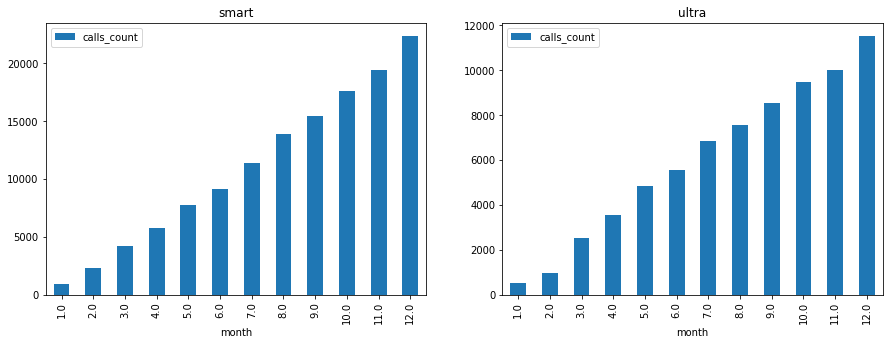

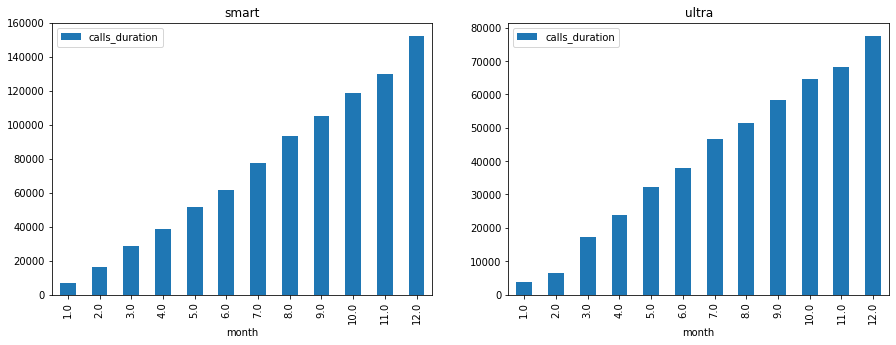

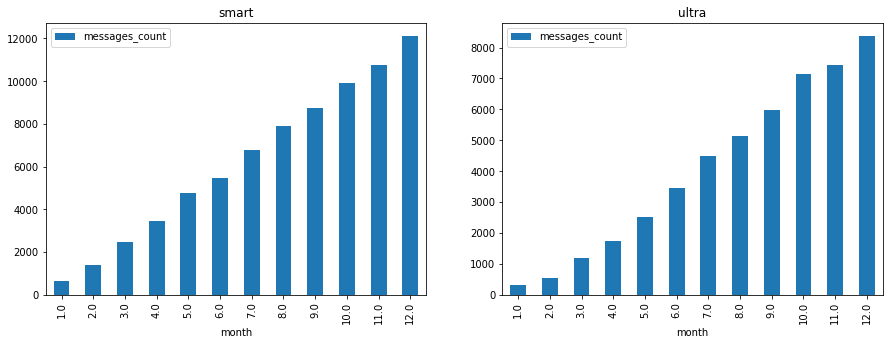

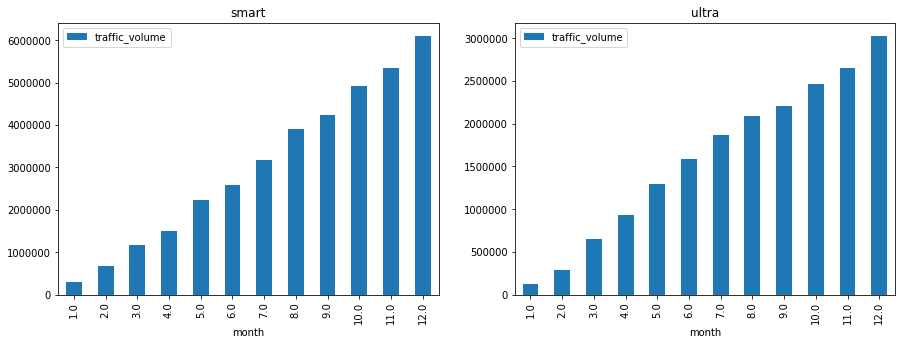

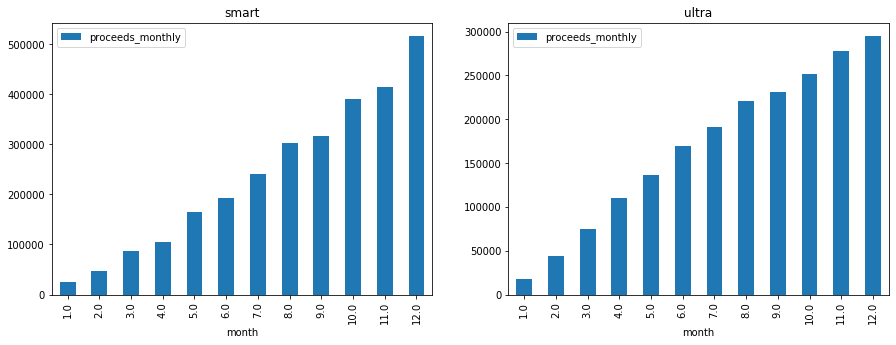

In [44]:
#строим графики для большей наглядности распределения значений параметров в течение года

for dms_col_name in ['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'proceeds_monthly']:
    fig, axs = plt.subplots(1,2)
    data_month_sum[data_month_sum.index=='smart'].plot(x='month', y=dms_col_name, kind='bar', title='smart', ax=axs[0], figsize=(15, 5))
    data_month_sum[data_month_sum.index=='ultra'].plot(x='month', y=dms_col_name, kind='bar', title='ultra', ax=axs[1], figsize=(15, 5))

In [45]:
print(data_proceeds_pivot[data_proceeds_pivot['tariff']=='smart']['tariff'].count())
print(data_proceeds_pivot[data_proceeds_pivot['tariff']=='ultra']['tariff'].count())

2228
975


Разный объем выборок, соответсвенно количественные показатели нас не очень интересуют.<br>
<br>
Все рассматриваемые параметры линейно растут от января к декабрю, независимо от того, какой тариф используется.<br>
Сложно объяснить такую зависимость, но рискну предположить, что в январе пользователи отдыхают по большей части и не особо рвутся пользоваться предоставленными возможностями современных технологий. Далее же год набирает обороты, становится больше работы, каких-то дел и планов, возможно "Мегалайн" устраивает какие-либо промоакции, что клиент охотнее продляет тариф или же покупает услуги связи. В декабре, в предверии новогодней суеты, количество звонков и использованного трафика всего зашкаливает, потому что как правио "все пытаются запрыгнуть в последний вагон", стараясь успеть все.<br>
<br>
Стоит отметить, что у тарифа "Ультра" рост все таки более плавный, что "Смарт".

***

*Посчитаем среднее, дисперсию и ско для всех пользователей в течение года*

In [46]:
for i in range(0, 3):
    functions = ['mean', np.var, np.std] # функции, которые будем применять к значениям
    tables = ['total_month_sum_mean', 'total_month_sum_var', 'total_month_sum_std'] # названия сводных таблиц
    list_of_cols = ['calls_duration', 'messages_count', 'traffic_volume', 'proceeds_monthly'] # значения
    suffix = ['_mean', '_var', '_std'] # суффикс, который добавим к именам колонок
    
    tables[i] = data_proceeds_pivot.pivot_table(index=['tariff'], values=list_of_cols, aggfunc=functions[i])
    tables[i].columns = ['calls_duration'+suffix[i], 'messages_count'+suffix[i],\
                         'traffic_volume'+suffix[i], 'proceeds_monthly'+suffix[i]]
    display(tables[i])

,calls_duration_mean,messages_count_mean,traffic_volume_mean,proceeds_monthly_mean
tariff,,,,
smart,395.078546,33.398564,1257.906194,16216.148564
ultra,500.517949,49.585641,2071.384615,19668.993846


,calls_duration_var,messages_count_var,traffic_volume_var,proceeds_monthly_var
tariff,,,,
smart,32353.071062,796.69963,641528.913064,3.436001e+07
ultra,89957.083610,2301.92464,142819.949455,9.886460e+07


,calls_duration_std,messages_count_std,traffic_volume_std,proceeds_monthly_std
tariff,,,,
smart,179.869595,28.225868,800.955001,5861.741292
ultra,299.928464,47.978377,377.915268,9943.067706


Пользователи тарифа "Ультра" более охотно пользуются услугами оператора.<br>
<br>
1) Высокое значение дисперсии у тарифа "Ультра" можно объяснить меньшим объемом выборки, чем у смарт;<br>
2) Низкая дисперсия в интернет-трафике говорит о том, что возможно пользователи выбирают тариф "Ультра" из-за более выгодного включенного пакета мегабайт трафика, т.к. сейчас в основном большая часть звонков и сообщений передается посредством сети интрнет. Следовательно пользователи "Ультра" не заботятся об экономии трафика и используют его свободно, что приводит к среднему с меньшим разбросом. В то время как пользователи смарт экономно используют свой лимит и в итоге к концу месяца у многих оставшийся трафик обнуляется, а у кого-то перерасход (потому что опускают момент с отслеживанием трафика).

In [47]:
#Строим частотные гистограммы для определения кол-ва пользователей,
#которые тратят то или иное кол-во предоставляемых услуг

#сгруппируем данные по тарифу и пользователям
group_hist = (
    (data_proceeds_pivot
     .pivot_table(index=['tariff', 'user_id'],\
                  values=['calls_count', 'calls_duration', 'messages_count', 'traffic_volume', 'proceeds_monthly'],\
                  aggfunc=sum))
)

# расставим столбцы в удобном порядке:
cols = group_hist.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[-2:4]
group_hist = group_hist[cols]

group_hist.reset_index(inplace=True)

group_hist

,tariff,user_id,calls_count,calls_duration,messages_count,traffic_volume,proceeds_monthly
0,smart,1001,122.0,801.0,0.0,32467.0,1700.0
1,smart,1002,217.0,1434.0,70.0,116041.0,7250.0
2,smart,1005,888.0,6248.0,552.0,99692.0,9045.0
3,smart,1006,506.0,3296.0,0.0,164194.0,10250.0
4,smart,1007,612.0,4143.0,225.0,131631.0,7867.0
...,...,...,...,...,...,...,...
492,ultra,1476,549.0,3981.0,45.0,150290.0,17550.0
493,ultra,1485,94.0,548.0,155.0,23423.0,1950.0
494,ultra,1491,648.0,4353.0,432.0,161466.0,17550.0
495,ultra,1493,110.0,702.0,94.0,54421.0,5700.0


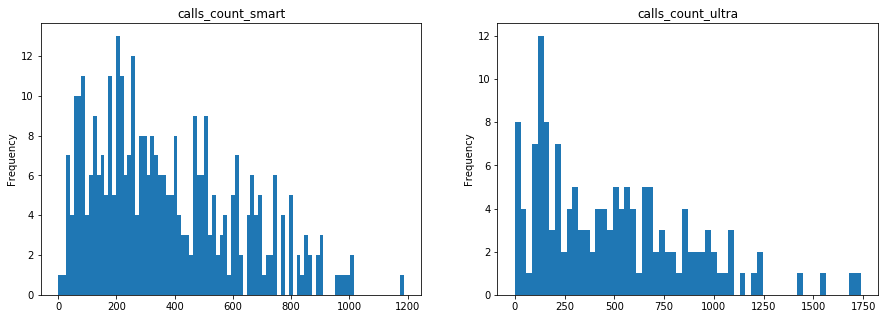

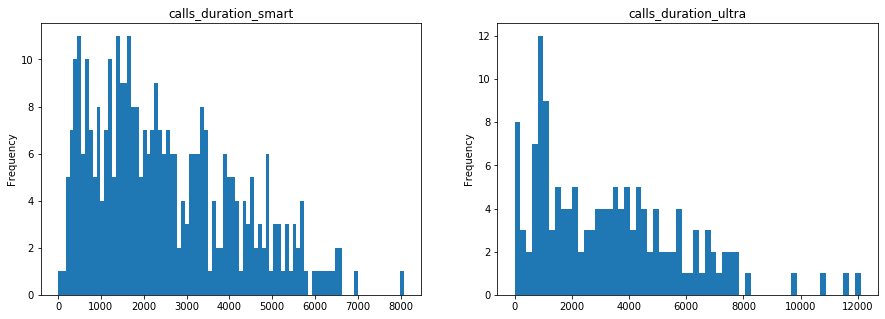

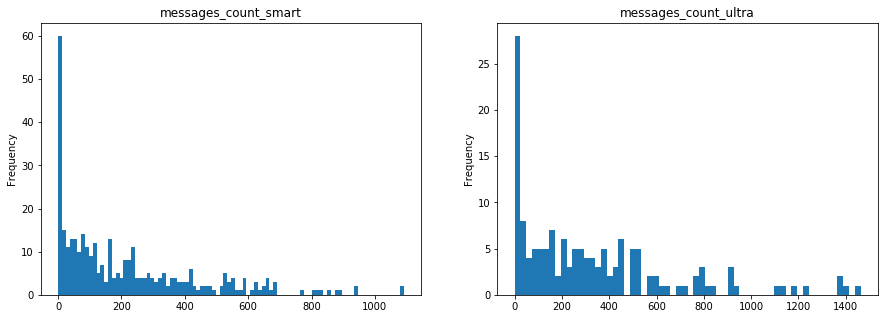

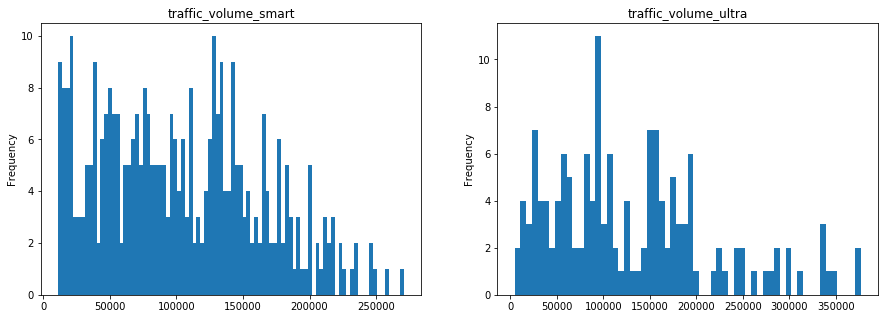

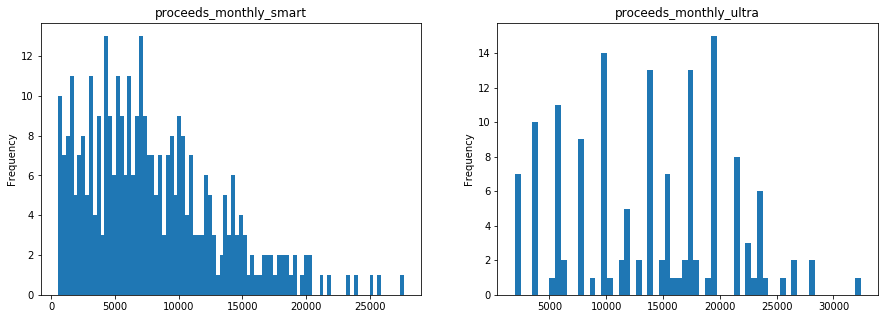

In [48]:
#так же как и с диаграммами, строим гистограммы при помощи цикла
for hist_name_column in group_hist.columns[2:]:
    fig, axs = plt.subplots(1,2)
    group_hist[group_hist['tariff']=='smart'][hist_name_column].plot(bins=90, kind='hist', figsize=(15, 5), title=hist_name_column+'_smart', ax=axs[0])
    group_hist[group_hist['tariff']=='ultra'][hist_name_column].plot(bins=60, kind='hist', figsize=(15, 5), title=hist_name_column+'_ultra', ax=axs[1])

Из-за высокого значения дисперсии ""Ультра имеет более длинные хвосты чем "Смарт".<br>
<br>
1) Количество звонков: max "Смарт" выходит на 200, max "Ультра" - около 130;<br>
2) Продолжительность звонков: у "Смарт" наблюдается два основных пика около 400 и 1500 минут, у "Ультра" один - около 1000. В основном люди тарифа "Смарт" говорят не больше 6000 минут в год, в то время как клиенты "Ультра" почти 8000 минут. Также можем наблюдать, что у "Ультра" есть небольшой пик на околонулевых значениях (0 - 250);<br>
3) Количество сообщений: в обоих тарифах доля людей мало или практически не использующих смс - высока. При этом следует помнить, что ранее мы заменили 500 пропусков в данных нулями и сейчас наблюдаем результаты этого действия. Но так же и не стоит забывать об использовании мессенджерей для онлайн-общения;<br>
4) Интернет-трафик: в обоих тарифах наблюдается четкая граница в районе 200000 мб, после которой совсем мало значений. Пик у "Ультра" в районе 100000 мб, у "Смарт" два пика - один в районе 20000, другой около 130000 мб.<br>
<br>
*Итоговый счет*: Так как пользователи подключались в разное время года и не все оставались на одном тарифе до конца мы видим, что большая часть трат на связь приходится до уровня минимальной годовой абонентской платы, которая для смарт составляет 6600, а для ультра 23400. У смарт второй пик находится в районе 7500, после чего идет плавное уменьшение числа людей перерасходовавших тарифный план, т.е. большая часть людей хоть немного, но исользует тарифы сверх лимитов. У "Ультра" большинство пользователей тратит до 20000, после чего есть еще одна граница в районе 23000-24000, после чего небольшой хвост, т.е. пользователя тарифа в основном укладываются в лимиты тарифного плана и не перерасходуют его.

***

## Проверка гипотез

### Первая гипотеза: Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую и альтернативную гипотезы:<br>

- H0 - средняя выручка пользователей тарифов «Ультра» и «Смарт» равны (в H0 всегда используется знак равенства);<br>
- H1 - средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.<br>

Чтобы проверить гипотезу о равенстве среднего применим метод scipy.stats.ttest_ind (array1, array2, equal_var), где equal_var - параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать). Т.к. мы знаем, что дисперсии выборок по смарт и ультра различаются (3.436001e+07 и 9.886460e+07 соответственно), то equal_var зададим как False.<br>
<br>
*Уровень значимости зададим alpha=0,05*

In [49]:
smart_ttest = data_proceeds_pivot[data_proceeds_pivot['tariff']=='smart']['proceeds_monthly']
ultra_ttest = data_proceeds_pivot[data_proceeds_pivot['tariff']=='ultra']['proceeds_monthly']

alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1678550574171129e-272
Отвергаем нулевую гипотезу


***Так как p-уровень значимости слишком мал, то принимаем альтернативную гипотезу о том, что средняя выручка пользователей тарифов "Ультра" и "Смарт" достаточно значимо различаются.***

### Вторая гипотеза: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезы:<br>

- H0 - средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов (в H0 всегда используется знак равенства);<br>
- H1 - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.<br>

Альтернативная гипотеза у нас двусторонняя, т.к. средняя выручка из Москвы может отличаться от других регионов как в большую так и в меньшую сторону.<br>
Для проверки гипотезы воспользуемся методом scipy.stats.ttest_1samp (array, popmean), где в качестве массива данных будет выборка выручки по Москве, а в качестве popmean (предполагаемого среднего) будет выступать среднее значение выручки пользователей из других регионов.<br>
<br>
*Уровень значимости зададим alpha=0,05*

In [50]:
moscow_ttest = data_proceeds_pivot[data_proceeds_pivot['city']=='Москва']['proceeds_monthly']

popmean = data_proceeds_pivot[data_proceeds_pivot['city']!='Москва']['proceeds_monthly'].mean()

# уровень значимости 5%
alpha = 0.05

results = st.ttest_1samp(moscow_ttest, popmean)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.3859979276331743
Не получилось отвергнуть нулевую гипотезу


p-уровень значимости практически 39%, что выше нашего заданного порогового значения значимости, а это означает, что средняя выручка по Москве статистически не отличается от средней выручки по регионам.

## Вывод

Проведя анализ тарифов "Ультра" и "Смарт" на выборке пользователей, можно сделать следующие обобщенные выводы:<br>
1) В среднем тарифы по выручке значимо отличаются друг от друга: пользователи тарифа "Ультра" платят больше;<br>
2) Так как выручка по Моске не отличается от других регионов, то есть смысл рекламную компанию запускать по всей территории распространения сети;<br>
3) Самым популярным тарифом является "Смарт", так как он дешевле в своей первональном пакете. Но тариф "Ультра" является самым прибыльным, так как он дороже и пользователи практически не выходят за рамки тарифного лимита (большой пакет гб и звонков), в то время как пользователи "Смарт" стараются в своем большинстве не расходовать больше лимита и соответственно не переплачивать.